In [1]:
!pip install tsai

!pip install fastai
!pip install fastai2
!pip install fastcore

     |████████████████████████████████| 234 kB 7.1 MB/s 
     |████████████████████████████████| 187 kB 39.4 MB/s 
     |████████████████████████████████| 2.5 MB 42.9 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 179 kB 11.9 MB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
# from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


import itertools
from itertools import product

import csv

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

from sklearn.decomposition import KernelPCA

import timeit

import random
import matplotlib.pyplot as plt

from tsai.all import *
computer_setup()

import sys
sys.stdout = open('./output_ts_to_RTP.txt', 'w')

print("Packages Loading done!!")

In [3]:
seq_data = np.load("/content/drive/MyDrive/spike2ts/seq_data_7000.npy")
attribute_data = np.load("/content/drive/MyDrive/spike2ts/seq_data_variant_names_7000.npy")


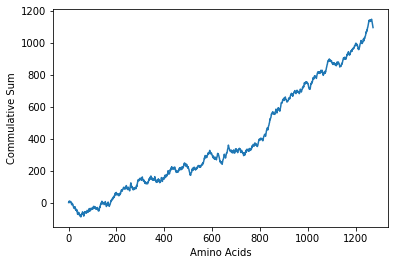

In [4]:




# 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P',
#        'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y'

total_int_seq = []

for i in range(len(seq_data)):
    dnaSeq = list(seq_data[i])
    res = [item.replace('A', '11') for item in dnaSeq]
    res = [item.replace('C', '10') for item in res]
    res = [item.replace('D', '9') for item in res]
    res = [item.replace('E', '8') for item in res]    
    res = [item.replace('F', '7') for item in res]
    res = [item.replace('G', '6') for item in res]
    res = [item.replace('H', '5') for item in res]    
    res = [item.replace('I', '4') for item in res]
    res = [item.replace('K', '3') for item in res]
    res = [item.replace('L', '2') for item in res]    
    res = [item.replace('M', '1') for item in res]
    res = [item.replace('N', '-1') for item in res]
    res = [item.replace('P', '-2') for item in res]    
    res = [item.replace('Q', '-3') for item in res]
    res = [item.replace('R', '-4') for item in res]
    res = [item.replace('S', '-5') for item in res]    
    res = [item.replace('T', '-6') for item in res]
    res = [item.replace('V', '-7') for item in res]
    res = [item.replace('W', '-8') for item in res]    
    res = [item.replace('X', '-9') for item in res]
    res = [item.replace('Y', '-10') for item in res]
    
    data = []
    for i in range(len(res)):
        data.append(float(res[i]))
    # print(data)
    
    total_int_seq.append(data)


# attribute_data = np.load("E:/RA/IJCAI/Dataset/Original/second_seq_data_variant_names_7000.npy")
attr_new = []
for i in range(len(attribute_data)):
    aa = str(attribute_data[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attr_new.append(aa_2)
    
    


unique_hst = list(np.unique(attr_new))

int_hosts = []
for ind_unique in range(len(attr_new)):
    variant_tmp = attr_new[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

y_val = int_hosts[:]


com_sum_full_data = []

for i in range(len(total_int_seq)):
    com_sum_full_data.append(np.cumsum(total_int_seq[i])) #cumulative sum


# t2 = np.cumsum(total_int_seq[1]) #cumulative sum

# t2 = np.cumsum(total_int_seq[1]) #cumulative sum
t2 = com_sum_full_data[1] #cumulative sum
# print(t2)
plt.plot(t2)
plt.ylabel('Commulative Sum')
plt.xlabel('Amino Acids')
plt.show()

from tsai.all import *
computer_setup()

# from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
# import timeit


X = to3d(np.array(com_sum_full_data))
y = np.array(y_val)

# aa = Xx.reshape((Xx.shape[0],1, Xx.shape[1]))
# X = aa[:]



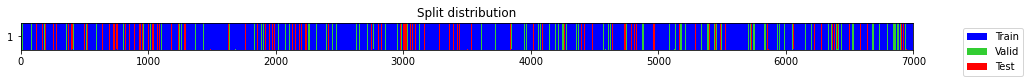

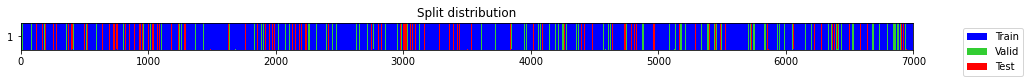

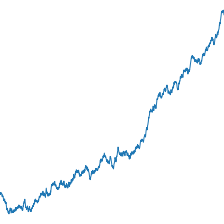

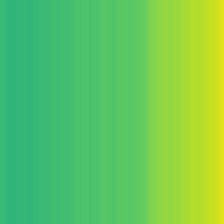

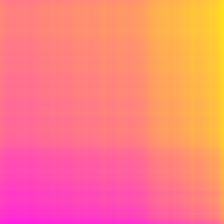

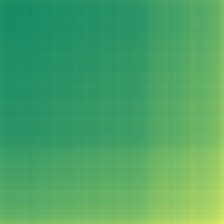

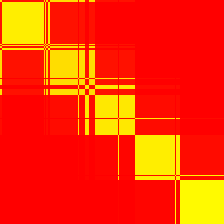

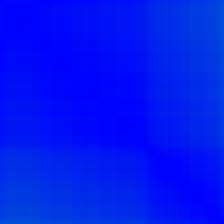

In [5]:
splits_new_2 = get_splits(np.array(y), valid_size=.10, test_size=.10, random_state=23, stratify=True)

X_train = X[splits_new_2[0]]
y_train = y[splits_new_2[0]]
X_test = X[splits_new_2[2]]
y_test = y[splits_new_2[2]]


# X = X_train[:]
# y = y_train[:]
(splits_new_2)

# aa = X.reshape((X.shape[0],1, X.shape[1]))
# aa.shape
# min(aa[0])
# splits_new_2 = get_splits(np.array(y), valid_size=.11, random_state=23, stratify=True)
splits_new = get_splits(np.array(y), valid_size=.10, test_size=.10, random_state=23, stratify=True)
splits_new


# dsid = 'NATOPS' # multivariate dataset
# X, y, splits = get_UCR_data(dsid, return_split=False)
# splits_new = get_splits(np.array(y), valid_size=.10, random_state=23, stratify=True)


unique_labels = len(np.unique(y_val))
tfms = [None, Categorize()]
bts = [[TSNormalize(), TSToPlot()], 
       [TSNormalize(), TSToMat(cmap='viridis')],
       [TSNormalize(), TSToGADF(cmap='spring')],
       [TSNormalize(), TSToGASF(cmap='summer')],
       [TSNormalize(), TSToMTF(cmap='autumn')],
       [TSNormalize(), TSToRP(cmap='winter')]]
btns = ['Plot', 'Mat', 'GADF', 'GASF', 'MTF', 'RP']
for i, (bt, btn) in enumerate(zip(bts, btns)):
#     yy = np.random.randint(0, 2, 60)
    
#     dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
    dsets = TSDatasets(X, y, tfms=tfms, splits=None)
    dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=bt, shuffle=False)
    xb, yb = dls.train.one_batch()
    print(f'\n\ntfm: TSTo{btn} - batch shape: {xb.shape}')
    xb[0].show()
    plt.show()

In [6]:
# !pip install https://github.com/pytorch/vision/archive/master.zip

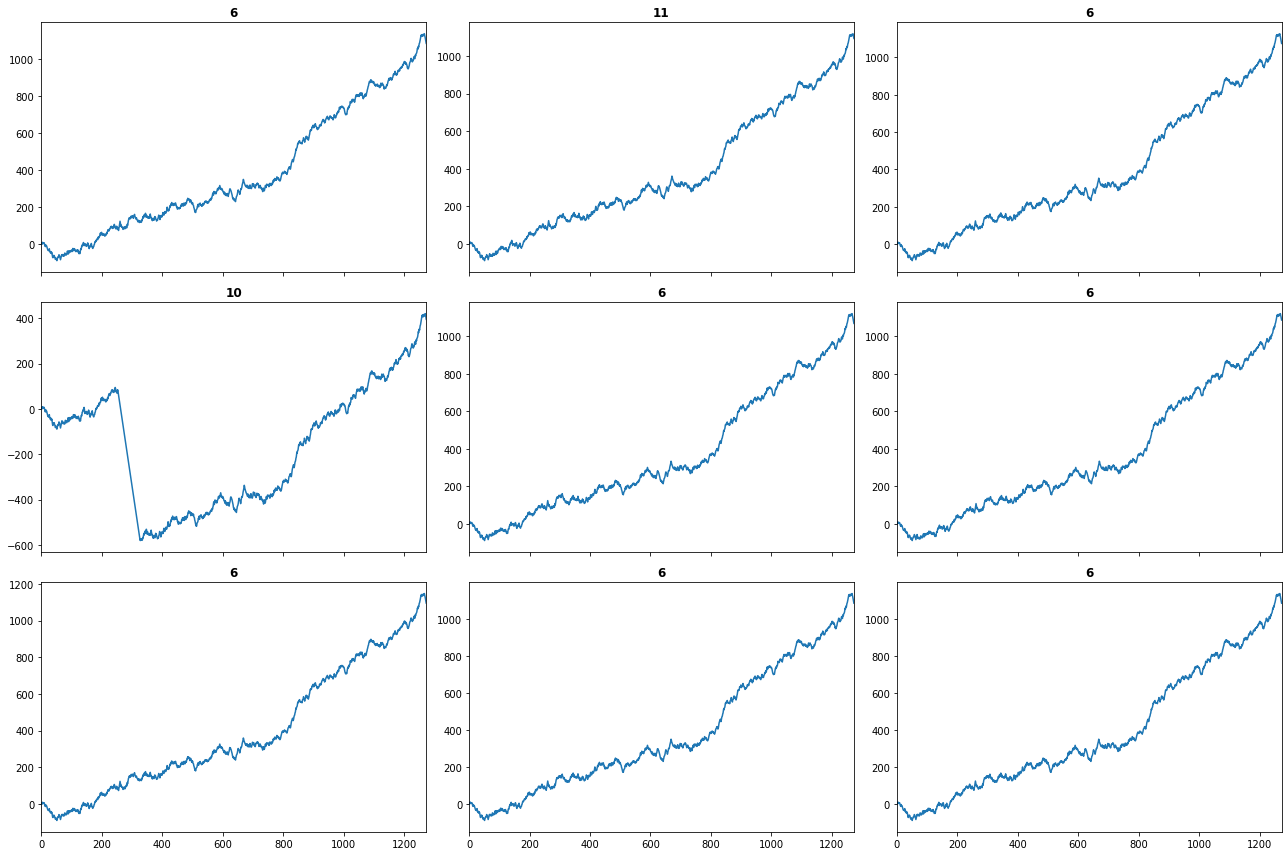

In [7]:
epochs = 1

print("Number of Epochs = ",epochs)

####################### Model Logic (Start) ############################################
tfms = [None, Categorize()]
# batch_tfms = [TSNormalize(), TSToRP(cmap='winter')]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_new)
# dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=32, batch_tfms=batch_tfms)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=32)
dls.show_batch()

####################### Model Logic (End) ############################################

In [ ]:
# model = create_model(OmniScaleCNN, dls=dls)
# learn = Learner(dls, model, metrics=accuracy)
# start = time.time()
# learn.fit_one_cycle(epochs, lr_max=1e-3)
# print(f"\ntraining time: {time.strftime('%H:%M:%S', time.gmtime(time.time() - start))}")
# learn.plot_metrics()

# archs = [(FCN, {}), (ResNet, {}), (xresnet1d34, {}), (ResCNN, {}), 
#          (LSTM, {'n_layers':1, 'bidirectional': False}), (LSTM, {'n_layers':2, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}), 
#          (LSTM, {'n_layers':1, 'bidirectional': True}), (LSTM, {'n_layers':2, 'bidirectional': True}), (LSTM, {'n_layers':3, 'bidirectional': True}),
#          (LSTM_FCN, {}), (LSTM_FCN, {'shuffle': False}), (InceptionTime, {}), (XceptionTime, {}), (OmniScaleCNN, {}), (mWDN, {'levels': 4})]

archs = [(ResNet, {}), (mWDN, {'levels': 4})]

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(100, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, total_params(model)[0], vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
    clear_output()
    display(results)

epoch,train_loss,valid_loss,accuracy,time
0,2.111036,2.021505,0.508571,08:26
1,1.951256,1.949676,0.508571,08:18
2,1.893568,1.993728,0.508571,08:16
3,1.752545,1.933434,0.520000,08:14
4,1.658905,2.053381,0.577143,08:17
5,1.604819,2.181755,0.238571,08:14
6,1.577663,2.041890,0.511429,08:15
7,1.543677,1.577945,0.607143,08:18
8,1.524249,2.477675,0.190000,08:12
9,1.428921,1.826105,0.608571,08:11
